In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.dates import DateFormatter

import os

# Update rcParams to set the default font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'

In [3]:
degradation_setting = "no_degradation"
rain_scenario = "KeinRegen"

In [4]:
def load_systems_data(degradation_setting, rain_scenario, file_type="concentrations"):
    if file_type=="concentrations":
        df_res = pd.read_csv(os.path.join("systems_output", "preprocessed", f"{degradation_setting}_{rain_scenario}.csv"))
    elif file_type=="flow_rates":
        df_res = pd.read_csv(os.path.join("systems_output", "preprocessed", f"flow_rates_{degradation_setting}_{rain_scenario}.csv"))
    else:
        assert False, f"file_type {file_type} not supported"

    df_res.time = pd.to_datetime(df_res.time)

    # drop MW064, RW156 (invalid calculations of ++systems)
    df_res = df_res.loc[~df_res.sampling_point.isin(["MW064", "RW156"]), :]
    # rename sampling locations according to naming in the paper
    df_res.sampling_point = df_res.sampling_point.map({"MW022": "1", "MW023": "2", "MW017": "3", "MW043": "4", "MW048": "5", 
                        "RW157": "6", "MW046": "7", "MW061": "8", "RW143": "9", "RW141": "10",
                        "RW155": "11", "MW059": "12", "RW211": "13", "MW054": "14",
                        "RW126": "15", "MW052": "16"})
    return df_res

In [5]:
df_res = load_systems_data(degradation_setting, rain_scenario, file_type="concentrations")

In [6]:
df_sub = df_res.loc[df_res.sampling_point == "2", :]

<Axes: xlabel='minutes', ylabel='copies/l'>

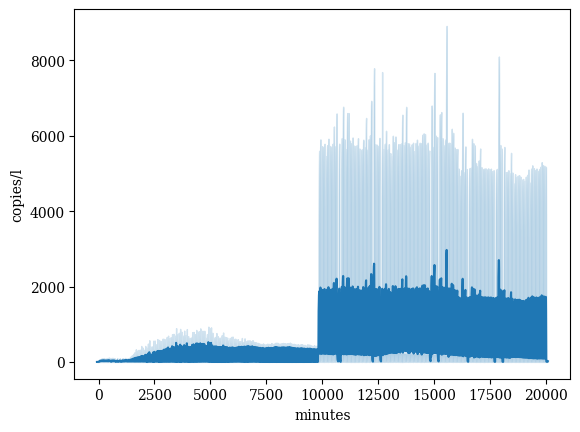

In [14]:
sns.lineplot(data=df_sub, x="minutes", y="copies/l")

<Axes: xlabel='minutes', ylabel='copies/l'>

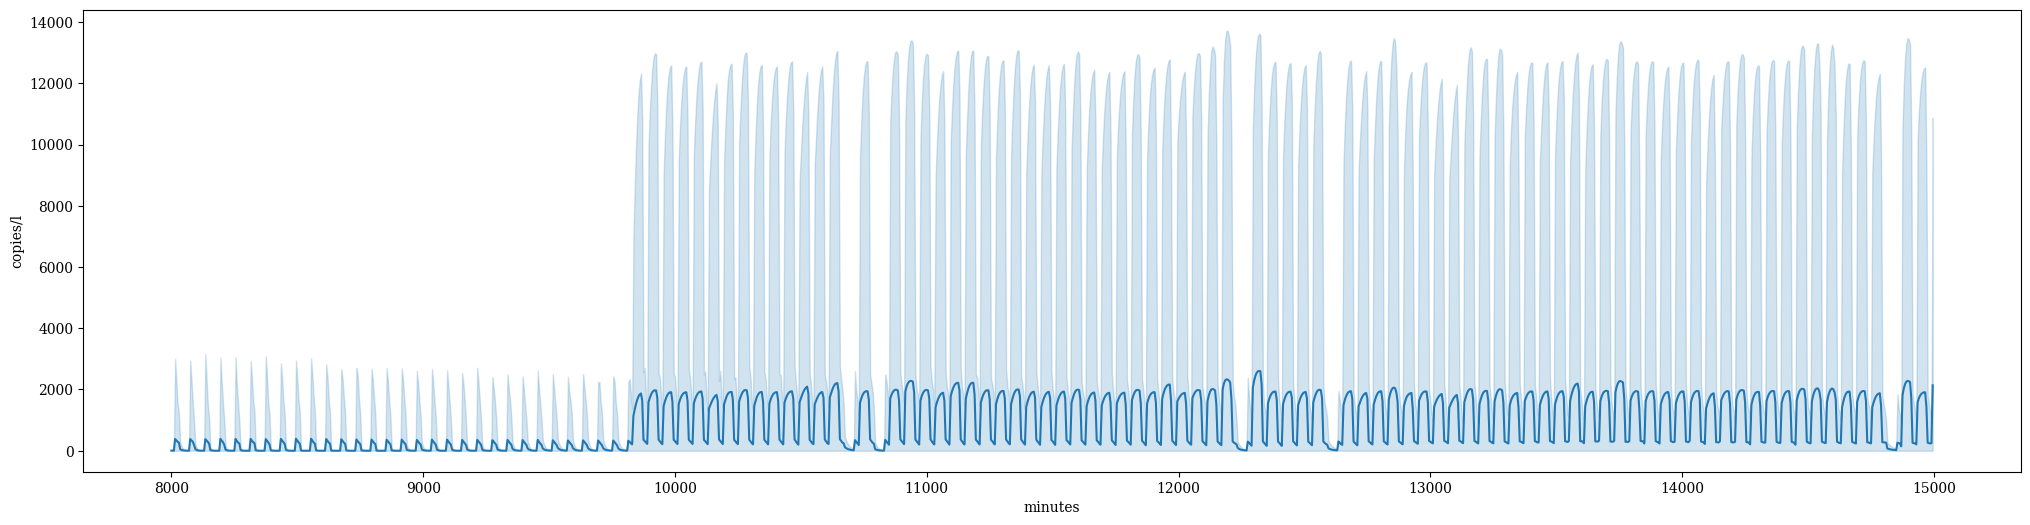

In [15]:
fig, ax = plt.subplots(figsize = (25,6))
sns.lineplot(data=df_sub.loc[(df_sub.minutes >= 8000) & (df_sub.minutes < 15000),:], x="minutes", y="copies/l", errorbar="pi")

In [9]:
na_count = df_sub.loc[(df_sub.minutes >= 9000) & (df_sub.minutes < 15000),:].groupby('minutes').agg({'copies/l': lambda x: x.isnull().sum()}).reset_index()

<Axes: xlabel='minutes', ylabel='copies/l'>

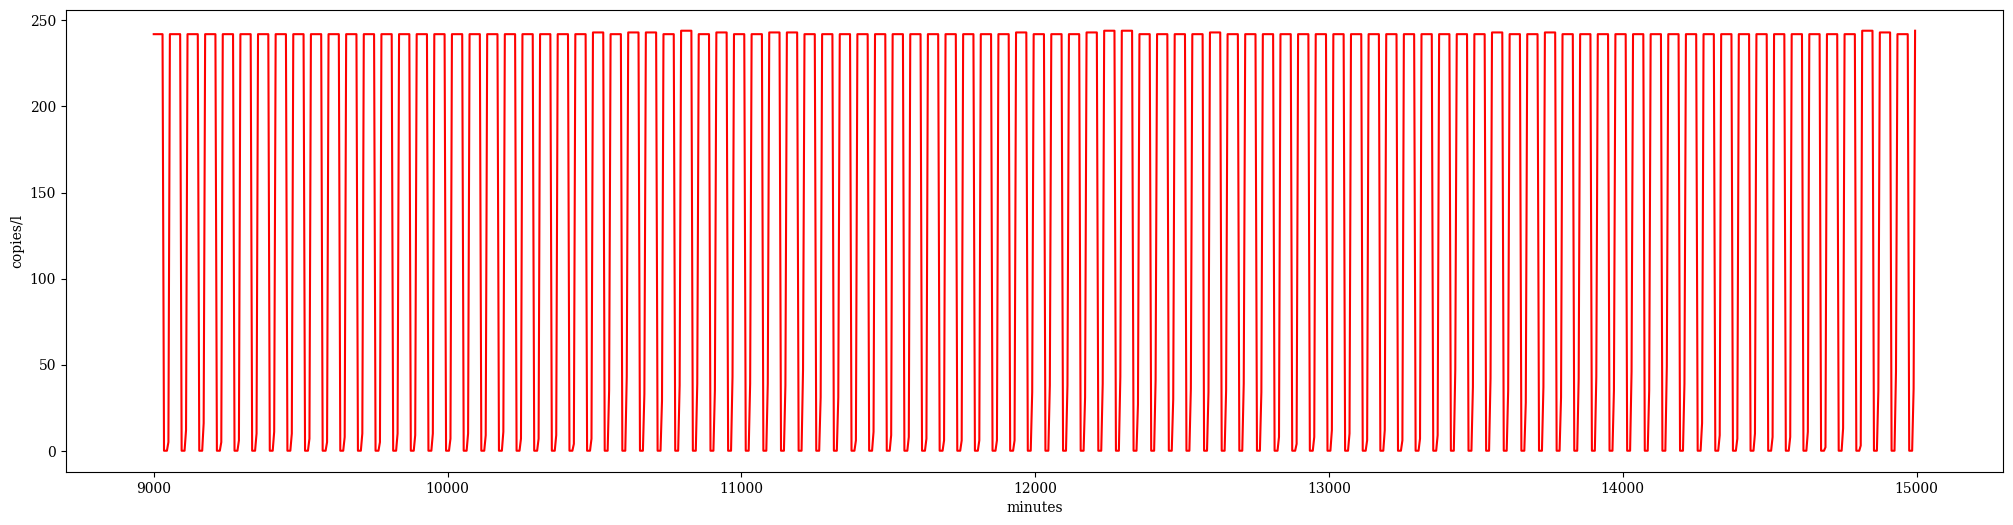

In [10]:
fig, ax = plt.subplots(figsize = (25,6))
sns.lineplot(data=na_count, x="minutes", y="copies/l", color="red")

In [11]:
rel_minutes = na_count.loc[na_count["copies/l"] == 0, "minutes"].values

<Axes: xlabel='minutes', ylabel='copies/l'>

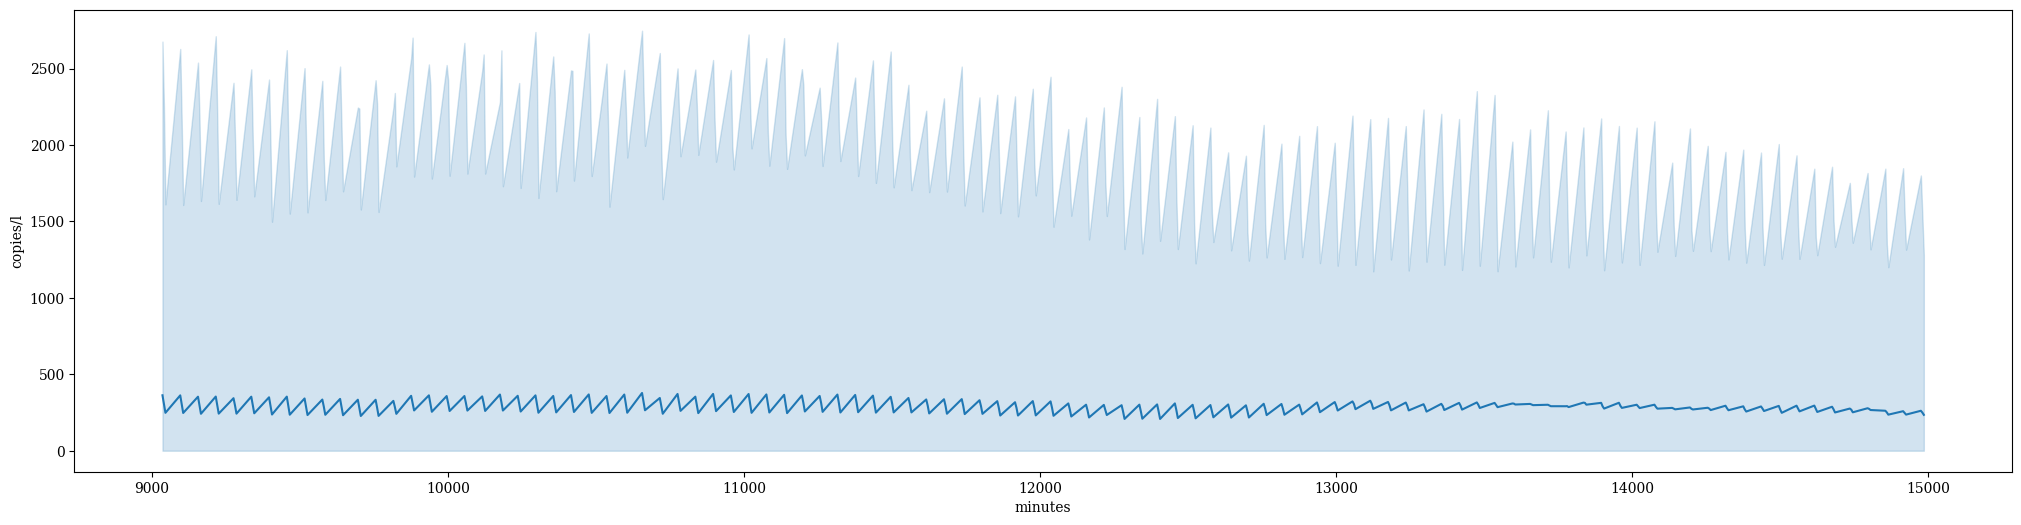

In [12]:
fig, ax = plt.subplots(figsize = (25,6))
sns.lineplot(data=df_sub.loc[(df_sub.minutes >= 9000) & (df_sub.minutes < 15000) & (df_sub.minutes.isin(rel_minutes)),:], x="minutes", y="copies/l", errorbar="pi")

In [16]:
na_count = df_res.groupby('sampling_point').agg({'copies/l': lambda x: x.isnull().sum()}).reset_index()
na_count.columns = ['sampling_point', 'na_count']
na_count["na_percent"] = na_count["na_count"] / (109269000/17)*100

,sampling_point,na_count,na_percent
0,1,2370,0.036872
1,10,1250,0.019447
2,11,399398,6.213808
3,12,5,0.000078
4,13,808383,12.576770
5,14,166,0.002583
6,15,432,0.006721
7,16,387,0.006021
8,2,656262,10.210082
9,3,2000,0.031116


## Periodicity of around 1h?

<Axes: xlabel='minutes', ylabel='copies/l'>

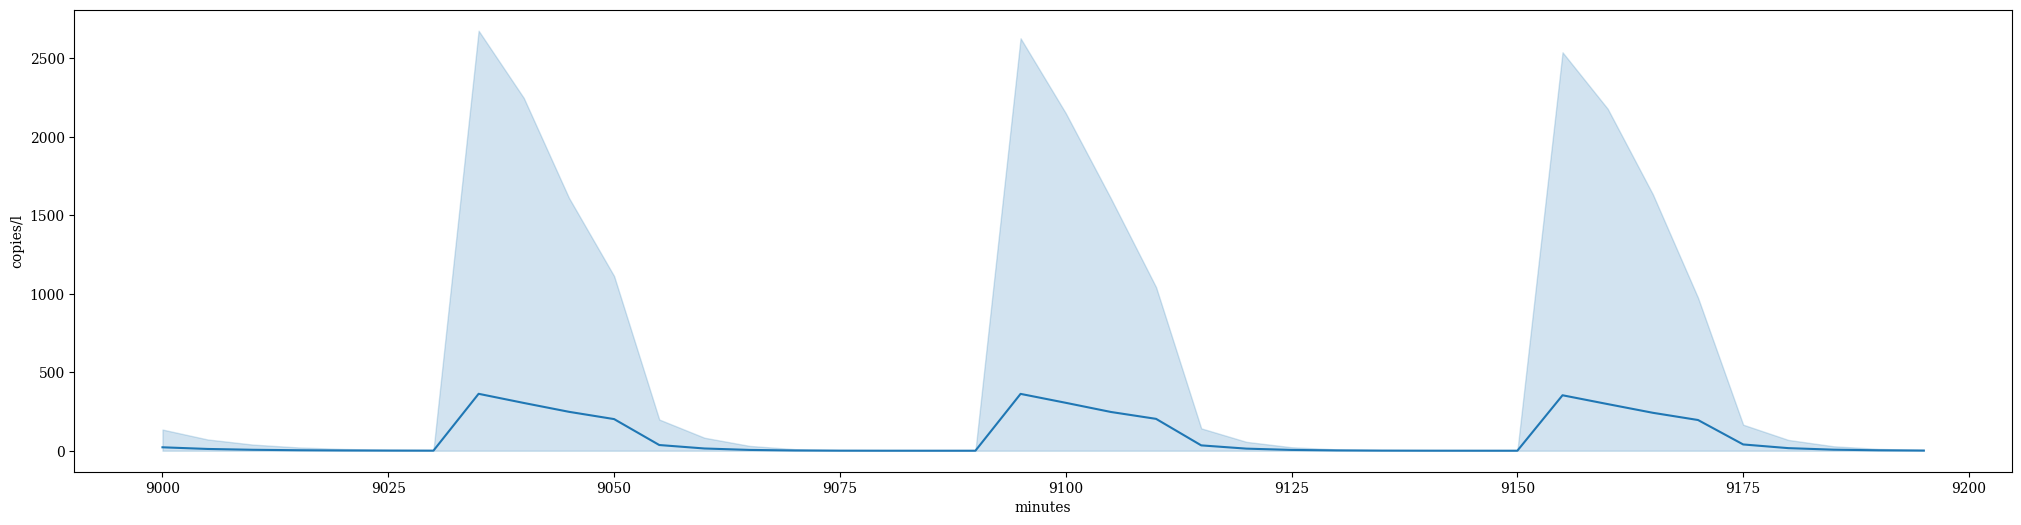

In [26]:
fig, ax = plt.subplots(figsize = (25,6))
sns.lineplot(data=df_sub.loc[(df_sub.minutes >= 9000) & (df_sub.minutes < 9200),:], x="minutes", y="copies/l", errorbar="pi")

<Axes: xlabel='minutes', ylabel='copies/l'>

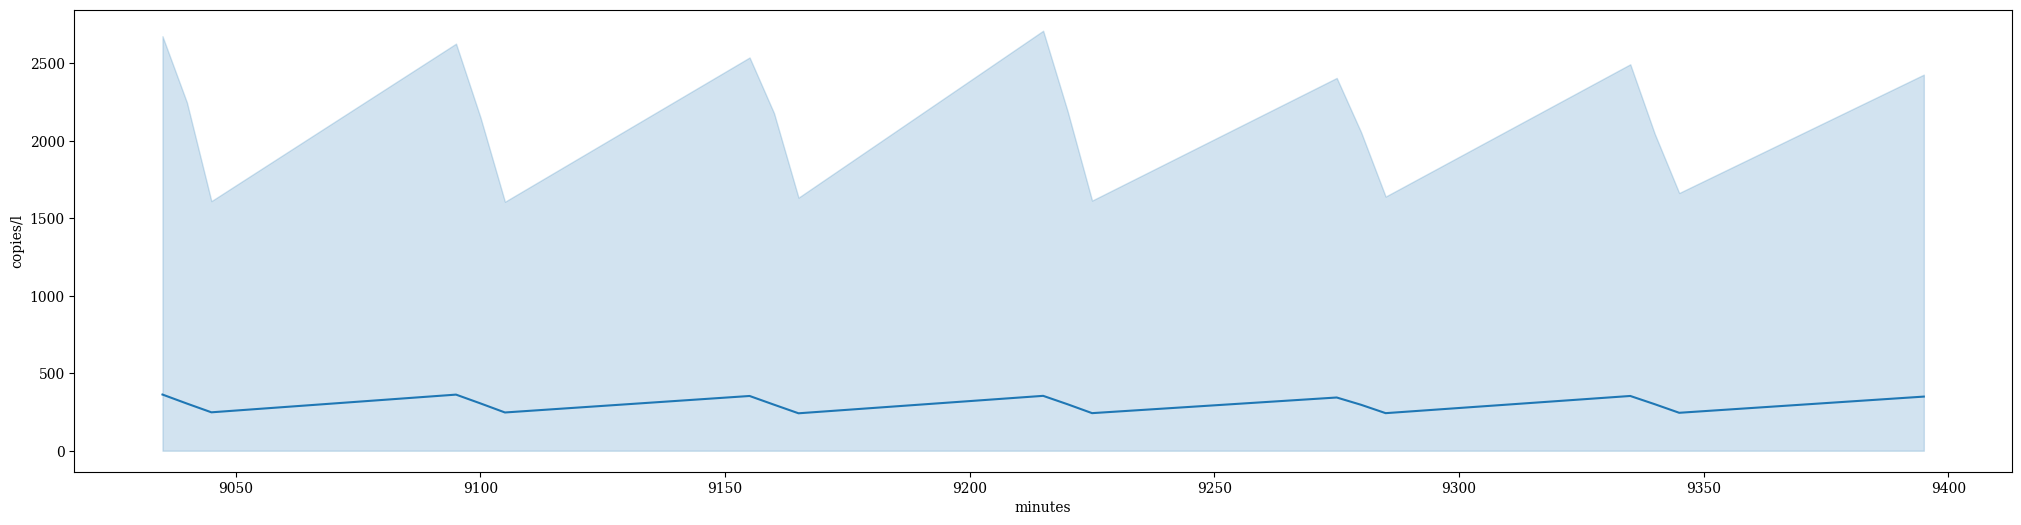

In [29]:
# after removing the NaNs, we still observe some stochasticity in the data
fig, ax = plt.subplots(figsize = (25,6))
sns.lineplot(data=df_sub.loc[(df_sub.minutes >= 9000) & (df_sub.minutes < 9400) & (df_sub.minutes.isin(rel_minutes)),:], x="minutes", y="copies/l", errorbar="pi")

In [36]:
df_sub = df_res.loc[df_res.sampling_point == "8", :]

<Axes: xlabel='minutes', ylabel='copies/l'>

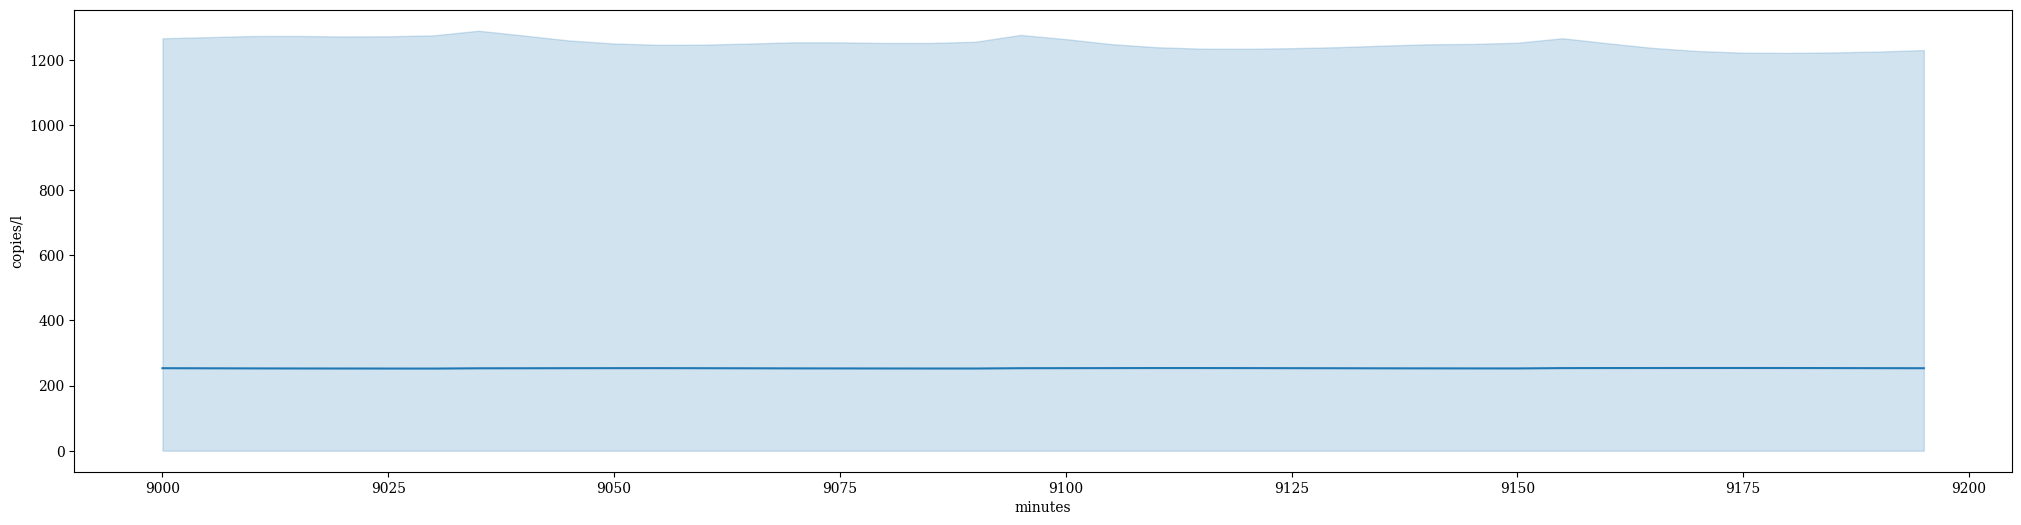

In [37]:
fig, ax = plt.subplots(figsize = (25,6))
sns.lineplot(data=df_sub.loc[(df_sub.minutes >= 9000) & (df_sub.minutes < 9200),:], x="minutes", y="copies/l", errorbar="pi")